In [5]:
from collections import defaultdict
import wandb


api = wandb.Api()

runs = api.runs(path="lad/sed")
def grouped_by_tax(min_length=100):
    grouped_by_tax = defaultdict(list)
    for run in runs:
         if 'charts/mean_episodic_return' in run.history().columns and len(run.history()['charts/mean_episodic_return']) > min_length:
            last_valid_index = run.history()['charts/mean_episodic_return'].last_valid_index()
            last_episodic_return = run.history()["charts/mean_episodic_return"].loc[last_valid_index]
            grouped_by_tax[run.config["fixed_tax"]].append(last_episodic_return)
    return grouped_by_tax

grouped_by_tax = grouped_by_tax()
print(len(grouped_by_tax))

4


In [6]:
def average_return_by_tax_group(groups):
    average_return_by_tax_group = {}
    for tax, returns in groups.items():
        avg_return = sum(returns) / len(returns)
        average_return_by_tax_group[tax] = avg_return
    return average_return_by_tax_group

avg_return = average_return_by_tax_group(grouped_by_tax)
print(avg_return)

{'4': 30.155606905619305, '3': 37.92567116873605, '2': 41.21745000566755, '1': 27.377124786376953}


/var/folders/vn/8zrpqcq50mxgnddhh87m72_80000gn/T/ipykernel_24095/4007060813.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tax_groups, y=avg_returns, palette="viridis")


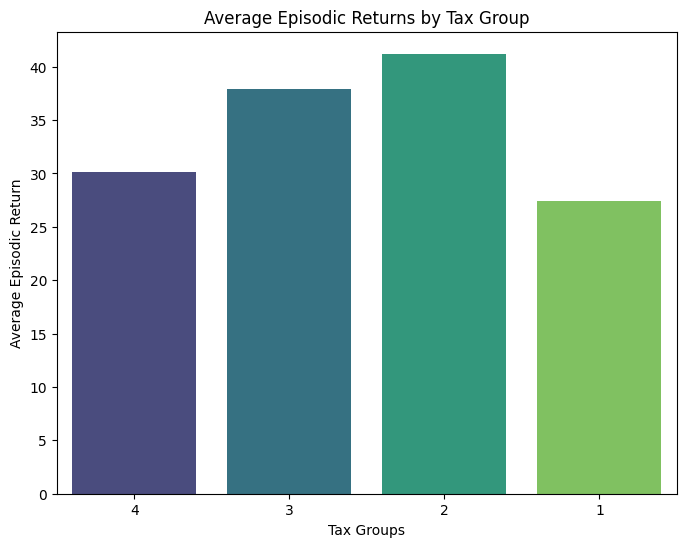

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_return_by_tax_group(avg_return):
    tax_groups = list(avg_return.keys())
    avg_returns = list(avg_return.values())

    plt.figure(figsize=(8,6))
    sns.barplot(x=tax_groups, y=avg_returns, palette="viridis")
    plt.title("Average Episodic Returns by Tax Group")
    plt.xlabel("Tax Groups")
    plt.ylabel("Average Episodic Return")
    plt.show()

plot_return_by_tax_group(avg_return)

In [8]:
def p_mean_taxed_return_by_sigma(runs, min_length=100):
    p_mean_taxed_return_by_sigma = defaultdict(list)
    for run in runs:
        if 'charts/p_mean_taxed_return' in run.history().columns and len(run.history()['charts/p_mean_taxed_return']) > min_length:
            p_mean_taxed_return_by_sigma[run.config["sigma_vals"]].append(run.history()["charts/p_mean_taxed_return"].tolist()[1:min_length])
    return p_mean_taxed_return_by_sigma
p_mean_taxed_return_by_sigma = p_mean_taxed_return_by_sigma(runs)
print(p_mean_taxed_return_by_sigma)


defaultdict(<class 'list'>, {'7': [[12.920966148376465, 32.80421829223633, 50.85715103149414, 65.50733947753906, 86.21040344238281, 100.92742156982422, 115.18910217285156, 129.74639892578125, 152.009521484375, 166.00831604003906, 178.59278869628906, 196.47531127929688, 211.21640014648438, 224.5522003173828, 241.22711181640625, 253.82456970214844, 272.0697326660156, 283.186279296875, 295.85089111328125, 305.363037109375, 320.5643005371094, 335.0032653808594, 350.805419921875, 360.978759765625, 375.8768005371094, 395.1920471191406, 416.520263671875, 437.0672912597656, 454.0962219238281, 474.62420654296875, 489.49456787109375, 505.7564697265625, 524.1135864257812, 547.2261352539062, 563.113525390625, 575.6569213867188, 584.9453125, 594.4542236328125, 613.04248046875, 623.9707641601562, 640.1846313476562, 659.2200927734375, 674.7843017578125, 689.6406860351562, 704.9077758789062, 728.3485107421875, 744.4314575195312, 761.2628784179688, 781.3244018554688, 805.9185180664062, 828.847595214843

In [9]:
import numpy as np
def avg_p_mean_taxed_return(p_mean_taxed_return_by_sigma):
    average_p_mean_return_by_tax_group = {}
    for sigma, runs in p_mean_taxed_return_by_sigma.items():
        transposed_runs = list(zip(*runs))
        averaged_run = [np.mean(episode) for episode in transposed_runs]
        average_p_mean_return_by_tax_group[sigma] = averaged_run
    return average_p_mean_return_by_tax_group
test_data = {
    '7': [[1, 2, 3], [4, 5, 6], [7, 8, 10]],  # Each internal list represents a run
    '4': [[2, 3, 4], [5, 6, 7], [8, 9, 10]]
}
print(avg_p_mean_taxed_return(test_data))
avg_p_mean_taxed_return = avg_p_mean_taxed_return(p_mean_taxed_return_by_sigma)

{'7': [4.0, 5.0, 6.333333333333333], '4': [5.0, 6.0, 7.0]}


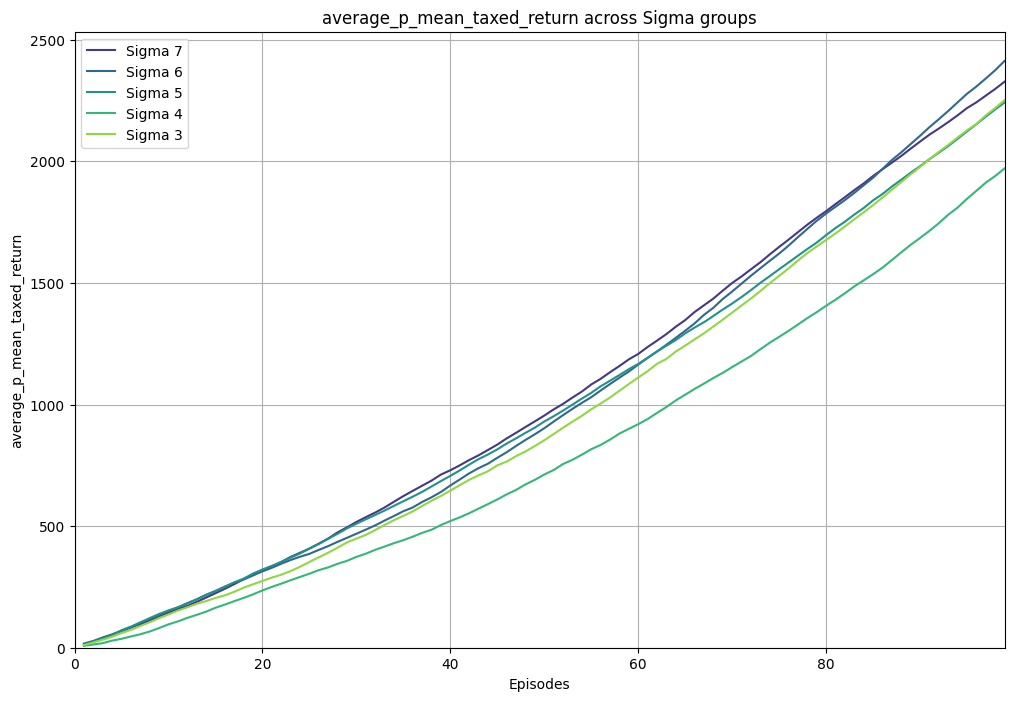

In [25]:
def plot_avg_p_mean_taxed_return_by_sigma(data):
    plt.figure(figsize=(12,8))

    min_length = min(len(val) for val in data.values())
    episodes = list(range(1, min_length+1))
    palette = sns.set_palette("viridis", n_colors=len(data.items()))
    for sigma, p_mean in data.items():
        sns.lineplot(x=episodes, y=p_mean[:min_length], label=f'Sigma {sigma}', palette=palette)
    plt.title('average_p_mean_taxed_return across Sigma groups')
    plt.xlabel('Episodes')
    plt.ylabel('average_p_mean_taxed_return')
    plt.xlim(left=0, right=min_length)
    plt.ylim(bottom=0)
    plt.grid(True)
    plt.show()
plot_avg_p_mean_taxed_return_by_sigma(avg_p_mean_taxed_return)